# Del 1

## Oppgave 1 (1 poeng) - Del 1

En butikk satte opp prisen for en vare med 12 kroner.

Dette tilsvarte en prisøkning på 30 %.

Hvor mye kostet varen før prisøkningen?

In [4]:
# La oss anta at den opprinnelige prisen er x kroner.
# Prisøkningen på 30 % tilsvarer 12 kroner.
# Vi kan sette opp ligningen: 0.30 * x = 12
# For å finne x, deler vi begge sider av ligningen på 0.30

opprinnelig_pris = 12 / 0.30
print(f"Opprinnelig pris på varen før prisøkningen: {opprinnelig_pris} kroner")

Opprinnelig pris på varen før prisøkningen: 40.0 kroner


## Oppgave 2 (4 poeng) - Del 1

Lars arbeider i en butikk etter skoletid og i helgene. 
Nedenfor ser du hvor mange timer han har arbeidet hver av de 10 siste dagene. 

3 3 4 5 6 8 0 3 5 5

a) Bestem gjennomsnittet og medianen.

In [3]:
arbeidstimer = [3, 3, 4, 5, 6, 8, 0, 3, 5, 5]

# Bestem gjennomsnittet
gjennomsnitt = sum(arbeidstimer) / len(arbeidstimer)
print(f"Gjennomsnittlig arbeidstid for Lars etter skoletid og i helgene er: {gjennomsnitt} timer")

# Bestem medianen
median = sorted(arbeidstimer)[len(arbeidstimer) // 2]
print(f"Median arbeidstid for Lars etter skoletid og i helgene er: {median} timer")

Gjennomsnittlig arbeidstid for Lars etter skoletid og i helgene er: 4.2 timer
Median arbeidstid for Lars etter skoletid og i helgene er: 5 timer


b) Bestem den kumulative frekvensen for 5 timer og forklar hva dette tallet betyr.

In [19]:
arbeidstimer = [3, 3, 4, 5, 6, 8, 0, 3, 5, 5]

# Bestem den kumulative frekvensen for 5 timer
kumulative_frekvens = sum(1 for time in arbeidstimer if time <= 5)
print(f"Den kumulative frekvensen for 5 timer er {kumulative_frekvens}."
      f" Dette tallet betyr at Lars har arbeidet 5 timer eller "
      f"mindre, i {kumulative_frekvens} av de siste 10 dager.")

Den kumulative frekvensen for 5 timer er 8. Dette tallet betyr at Lars har arbeidet 5 timer eller mindre, i 8 av de siste 10 dager.


## Oppgave 3 (2 poeng) - Del 1

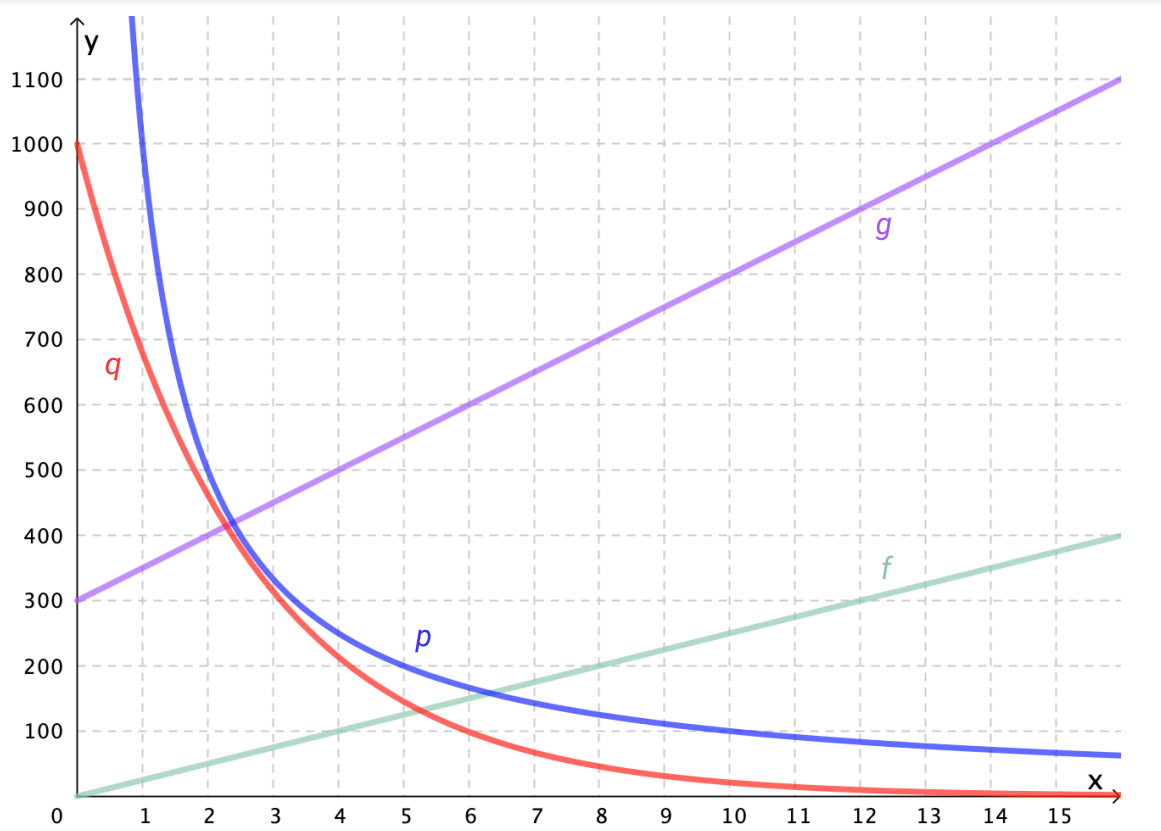

Ovenfor ser du grafene til fire funksjoner f, g, p og q.

• Avgjør om en eller flere av grafene viser sammenhengen mellom to størrelser
som er proporsjonale.

• Avgjør om en eller flere av grafene viser sammenhengen mellom to størrelser
som er omvendt proporsjonale.

Husk å argumentere for svarene dine. 

Lineær regresjon er best: y = 25.00x + 0.00


C:\Users\Christian\AppData\Local\Temp\ipykernel_17728\374207189.py:14: RuntimeWarning: divide by zero encountered in divide
  return a / x
C:\Users\Christian\AppData\Local\Temp\ipykernel_17728\374207189.py:39: OptimizeWarning: Covariance of the parameters could not be estimated
  popt_omvendt, _ = curve_fit(omvendt_proporsjonal, x, y)


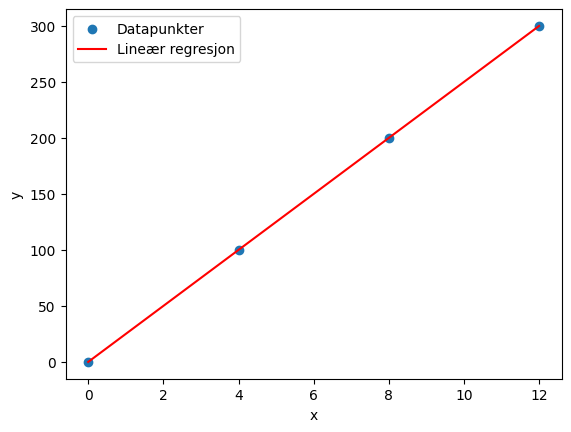

Lineær regresjonsfunksjon er proporsjonal: True
Lineær regresjonsfunksjon er omvendt proporsjonal: False


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Eksempeldata
x = np.array([0, 4, 8, 12])  # Vi starter med x = 0.1 for å unngå divisjon med 0
y = np.array([0, 100, 200, 300])

# Definer funksjoner for lineær og omvendt proporsjonal regresjon
def lineær(x, a, b):
    return a * x + b

def omvendt_proporsjonal(x, a):
    return a / x

# Funksjon for å sjekke om to størrelser er proporsjonale
def er_proporsjonal(x_verdier, y_verdier):
    forhold = [y / x for x, y in zip(x_verdier, y_verdier) if x != 0]
    return all(np.isclose(f, forhold[0]) for f in forhold)

# Funksjon for å sjekke om to størrelser er omvendt proporsjonale
def er_omvendt_proporsjonal(x_verdier, y_verdier):
    produkter = [y * x for x, y in zip(x_verdier, y_verdier)]
    return all(np.isclose(p, produkter[0]) for p in produkter)

# Funksjon for å finne den beste regresjonen (lineær eller omvendt proporsjonal)
def velg_best_regresjon(x, y):
    # Utfør lineær regresjon
    try:
        popt_lineær, _ = curve_fit(lineær, x, y)
        a_lineær, b_lineær = popt_lineær
        y_lineær = lineær(x, a_lineær, b_lineær)
        lineær_mse = np.mean((y - y_lineær)**2)  # Mean Squared Error for lineær
    except Exception as e:
        lineær_mse = np.inf

    # Utfør omvendt proporsjonal regresjon
    try:
        popt_omvendt, _ = curve_fit(omvendt_proporsjonal, x, y)
        a_omvendt = popt_omvendt[0]
        y_omvendt = omvendt_proporsjonal(x, a_omvendt)
        omvendt_mse = np.mean((y - y_omvendt)**2)  # Mean Squared Error for omvendt proporsjonal
    except Exception as e:
        omvendt_mse = np.inf

    # Velg den modellen med lavest MSE
    if lineær_mse < omvendt_mse:
        print(f"Lineær regresjon er best: y = {a_lineær:.2f}x + {b_lineær:.2f}")
        return "lineær", a_lineær, b_lineær
    else:
        print(f"Omvendt proporsjonal regresjon er best: y = {a_omvendt:.2f}/x")
        return "omvendt", a_omvendt

# Velg den beste regresjonsmodellen
modell, *parametre = velg_best_regresjon(x, y)

# Generer y-verdier basert på valgt regresjonsmodell
if modell == "lineær":
    a_lineær, b_lineær = parametre
    y_regresjon = lineær(x, a_lineær, b_lineær)
elif modell == "omvendt":
    a_omvendt = parametre[0]
    y_regresjon = omvendt_proporsjonal(x, a_omvendt)

# Plotting av data og regresjonslinje
plt.scatter(x, y, label='Datapunkter')
plt.plot(x, y_regresjon, color='red' if modell == "lineær" else 'blue', label=f'{modell.capitalize()} regresjon')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

# Sjekk om modellen er proporsjonal eller omvendt proporsjonal
if modell == "lineær":
    print(f"Lineær regresjonsfunksjon er proporsjonal: {er_proporsjonal(x, y_regresjon)}")
    print(f"Lineær regresjonsfunksjon er omvendt proporsjonal: {er_omvendt_proporsjonal(x, y_regresjon)}")
elif modell == "omvendt":
    print(f"Omvendt proporsjonal regresjonsfunksjon er proporsjonal: {er_proporsjonal(x, y_regresjon)}")
    print(f"Omvendt proporsjonal regresjonsfunksjon er omvendt proporsjonal: {er_omvendt_proporsjonal(x, y_regresjon)}")


## Oppgave 4 (3 poeng) - Del 1
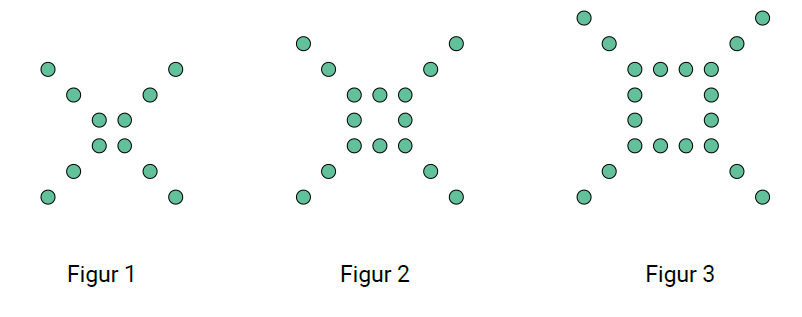


Ovenfor ser du tre figurer. Figurene er satt sammen av små sirkler.
Tenk deg at du skal fortsette å lage figurer etter samme mønster.


a) Hvor mange små sirkler vil det være i figur 4 og i figur 10?

In [26]:
# Figurtall
!pip install scipy
import numpy as np
from scipy.optimize import curve_fit

# Eksempel på noen ulike figurtall du kan endre verdiene på
figurtall = [12,16,20]

def lineær_funksjon(x, a, b):
    return a * x + b

def kvadratisk_funksjon(x, a, b, c):
    return a * x**2 + b * x + c

def fjerdegrads_funksjon(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

def femtegrads_funksjon(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

def sjettegrads_funksjon(x, a, b, c, d, e, f, g):
    return a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g

def potens_funksjon(x, a, b):
    return a * x**b

def eksponential_funksjon(x, a, b):
    return a * np.exp(b * x)

def best_fitting_function(figurtall):
    x_data = np.arange(1, len(figurtall) + 1)
    y_data = np.array(figurtall)

    models = [
        (lineær_funksjon, "f(n) = {:.2f}n + {:.2f}"),
        (kvadratisk_funksjon, "f(n) = {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (fjerdegrads_funksjon, "f(n) = {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (femtegrads_funksjon, "f(n) = {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (sjettegrads_funksjon, "f(n) = {:.2f}n^6 + {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (potens_funksjon, "f(n) = {:.2f}n^{:.2f}"),
        (eksponential_funksjon, "f(n) = {:.2f}e^{:.2f}n")
    ]

    best_model = None
    best_rss = np.inf
    best_params = None
    best_equation = ""

    for func, equation in models:
        try:
            popt, _ = curve_fit(func, x_data, y_data)
            y_fit = func(x_data, *popt)
            rss = np.sum((y_data - y_fit) ** 2)

            if np.all(np.diff(y_fit) >= 0):
                if rss < best_rss:
                    best_rss = rss
                    best_model = func
                    best_params = popt
                    best_equation = equation.format(*popt)

        except Exception as e:
            print(f"Feil med modell {func.__name__}: {e}")
            continue

    return best_model, best_params, best_equation

# Finn den beste tilpassede funksjonen
funksjon, params, funksjon_str = best_fitting_function(figurtall)

if funksjon:
    print(f"Den beste tilpassede funksjonen er: {funksjon_str}")
    # (Endre disse verdiene)
    n_values = [10] # Bytt ut dette tallet :)
    for figurnummer in n_values:
        figurverdi = funksjon(figurnummer, *params)
        print(f"Figurtallet for figur {figurnummer} er: {int(round(figurverdi))}")
else:
    print("Kunne ikke gjenkjenne en passende funksjon.")

Feil med modell fjerdegrads_funksjon: The number of func parameters=5 must not exceed the number of data points=3
Feil med modell femtegrads_funksjon: The number of func parameters=6 must not exceed the number of data points=3
Feil med modell sjettegrads_funksjon: The number of func parameters=7 must not exceed the number of data points=3
Den beste tilpassede funksjonen er: f(n) = 4.00n + 8.00
Figurtallet for figur 10 er: 48


C:\Users\Christian\AppData\Local\Temp\ipykernel_18176\1484365583.py:51: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(func, x_data, y_data)


b) Lag en formel for antall sirkler i figur n.

In [24]:
# Figurtall
!pip install scipy
import numpy as np
from scipy.optimize import curve_fit

# Eksempel på noen ulike figurtall du kan endre verdiene på
figurtall = [12,16,20]

def lineær_funksjon(x, a, b):
    return a * x + b

def kvadratisk_funksjon(x, a, b, c):
    return a * x**2 + b * x + c

def fjerdegrads_funksjon(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

def femtegrads_funksjon(x, a, b, c, d, e, f):
    return a * x**5 + b * x**4 + c * x**3 + d * x**2 + e * x + f

def sjettegrads_funksjon(x, a, b, c, d, e, f, g):
    return a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g

def potens_funksjon(x, a, b):
    return a * x**b

def eksponential_funksjon(x, a, b):
    return a * np.exp(b * x)

def best_fitting_function(figurtall):
    x_data = np.arange(1, len(figurtall) + 1)
    y_data = np.array(figurtall)

    models = [
        (lineær_funksjon, "f(n) = {:.2f}n + {:.2f}"),
        (kvadratisk_funksjon, "f(n) = {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (fjerdegrads_funksjon, "f(n) = {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (femtegrads_funksjon, "f(n) = {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (sjettegrads_funksjon, "f(n) = {:.2f}n^6 + {:.2f}n^5 + {:.2f}n^4 + {:.2f}n^3 + {:.2f}n^2 + {:.2f}n + {:.2f}"),
        (potens_funksjon, "f(n) = {:.2f}n^{:.2f}"),
        (eksponential_funksjon, "f(n) = {:.2f}e^{:.2f}n")
    ]

    best_model = None
    best_rss = np.inf
    best_params = None
    best_equation = ""

    for func, equation in models:
        try:
            popt, _ = curve_fit(func, x_data, y_data)
            y_fit = func(x_data, *popt)
            rss = np.sum((y_data - y_fit) ** 2)

            if np.all(np.diff(y_fit) >= 0):
                if rss < best_rss:
                    best_rss = rss
                    best_model = func
                    best_params = popt
                    best_equation = equation.format(*popt)

        except Exception as e:
            print(f"Feil med modell {func.__name__}: {e}")
            continue

    return best_model, best_params, best_equation

# Finn den beste tilpassede funksjonen
funksjon, params, funksjon_str = best_fitting_function(figurtall)

if funksjon:
    print(f"Den beste tilpassede funksjonen er: {funksjon_str}")
    # (Endre disse verdiene)
    n_values = [4] # Bytt ut dette tallet :)
    for figurnummer in n_values:
        figurverdi = funksjon(figurnummer, *params)
        print(f"Figurtallet for figur {figurnummer} er: {int(round(figurverdi))}")
else:
    print("Kunne ikke gjenkjenne en passende funksjon.")

Feil med modell fjerdegrads_funksjon: The number of func parameters=5 must not exceed the number of data points=3
Feil med modell femtegrads_funksjon: The number of func parameters=6 must not exceed the number of data points=3
Feil med modell sjettegrads_funksjon: The number of func parameters=7 must not exceed the number of data points=3
Den beste tilpassede funksjonen er: f(n) = 4.00n + 8.00
Figurtallet for figur 4 er: 24


C:\Users\Christian\AppData\Local\Temp\ipykernel_18176\2765578421.py:51: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(func, x_data, y_data)


## Oppgave 5 (3 poeng) - Del 1

Sara har lest om en bedrift som regner med å slippe ut 200 tonn CO2 i 2025.

Bedriften har som mål å redusere utslippet med 2,5 % hvert år framover.

Sara har laget programmet nedenfor.

a) Gi en praktisk tolkning av uttrykket Sara har brukt i linje 2.

b) Hva vil verdien som skrives ut når programmet kjøres, fortelle Sara?

a)
Uttrykket i linje 2 er en eksponentialfunksjon som uttrykket antall tonn CO2 bedriften slipper ut x år etter 2025.

200 er antall tonn CO2-utlipp i 2025.

0,975 er vekstfaktoren for en årlig nedgang i CO2-utslipp på 2,5 %.

b)
x er antall år, og s er summen av CO2-utslippene. Programmet regner ut summen av CO2-utslippene 4 år etter 2025 (altså i 2029).

In [26]:
def f(x):
    return 200*0.975**x
x=0
s=0

while x<=4:
    s = s + f(x)
    x = x + 1
print(s)

951.2344531250001


# Del 2

## Oppgave 1 (6 poeng) - Del 2

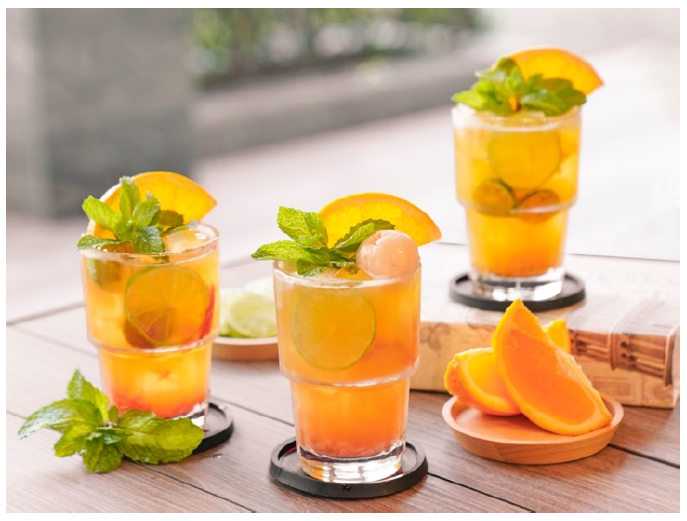

En bedrift produserer iste. Funksjonen gitt ved 

F(x) = 600*1.045^x

er en modell som viser hvor mange flasker av isteen bedriften regner med å selge
hver måned fra og med desember 2024.
For å regne ut salget i desember 2024 kan vi sette x = 0, for å regne ut salget i januar
2025 kan vi sette x = 1 og så videre.
a) Vis hvordan du på to ulike måter kan svare på spørsmål 1) og på spørsmål 2)
nedenfor.
1) Hvor mange flasker iste regner bedriften med å selge i desember 2025
ifølge modellen?
2) Når vil bedriften for første gang selge mer enn 2000 flasker iste i løpet av
en måned ifølge modellen?
b) Hvor mange prosent vil salget øke med fra desember 2024 til desember 2026
ifølge modellen?

In [27]:
# Måte 1: Direkte beregning
# Funksjonen som viser hvor mange flasker av isteen bedriften regner med å selge hver måned
def salg_funksjon(x):
    return 620 * 1.045**x

# Desember 2025 er 12 måneder etter desember 2024, så x = 12
desember_2025_salg = salg_funksjon(12)
print(f"Antall flasker iste bedriften regner med å selge i desember 2025: {desember_2025_salg:.2f}")

Antall flasker iste bedriften regner med å selge i desember 2025: 1051.45


In [28]:
# Måte 2: Bruke NUMPY
import numpy as np

# Desember 2025 er 12 måneder etter desember 2024, så x = 12
x = 12
desember_2025_salg = 620 * np.power(1.045, x)
print(f"Antall flasker iste bedriften regner med å selge i desember 2025: {desember_2025_salg:.2f}")

Antall flasker iste bedriften regner med å selge i desember 2025: 1051.45


In [38]:
# Måte 1: Iterativ beregning
# Vi finner den første måneden hvor salget overstiger 2000 flasker
x = 0
while salg_funksjon(x) <= 2000:
    x += 1
første_måned_over_2000 = x
print(f"Bedriften vil for første gang selge mer enn 2000 flasker iste i løpet av en måned i måned {første_måned_over_2000} (dvs i februar 2027).")

Bedriften vil for første gang selge mer enn 2000 flasker iste i løpet av en måned i måned 27 (dvs i februar 2027).


In [37]:
# Måte 2: Løse eksponentiell ligning
import numpy as np

# Løse ligningen 620 * 1.045^x = 2000
x = np.log(2000 / 620) / np.log(1.045)
print(f"Bedriften vil for første gang selge mer enn 2000 flasker iste i løpet av en måned i måned {np.ceil(x)} (dvs i februar 2027).")

Bedriften vil for første gang selge mer enn 2000 flasker iste i løpet av en måned i måned 27.0 (dvs i februar 2027).


In [34]:
# b) Hvor mange prosent vil salget øke med fra desember 2024 til desember 2026 ifølge modellen?
# Desember 2026 er 24 måneder etter desember 2024, så vi setter ( x = 24 ).
# Desember 2024 salg
desember_2024_salg = salg_funksjon(0)

# Desember 2026 salg
desember_2026_salg = salg_funksjon(24)

# Beregn prosentvis økning
prosent_økning = ((desember_2026_salg - desember_2024_salg) / desember_2024_salg) * 100
print(f"Salget vil øke med {prosent_økning:.2f} % fra desember 2024 til desember 2026 ifølge modellen.")

Salget vil øke med 187.60 % fra desember 2024 til desember 2026 ifølge modellen.


## Oppgave 2 (poeng) - Del 2

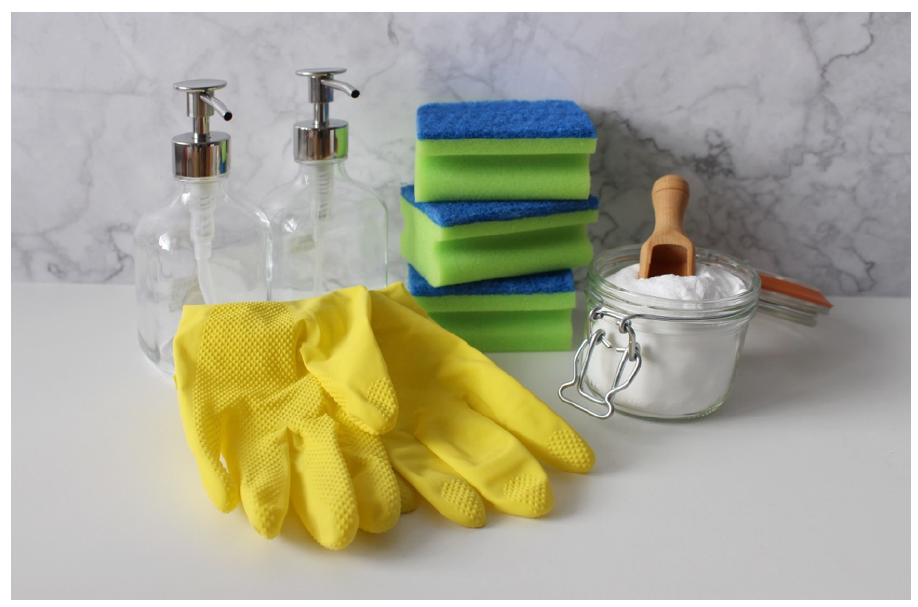

Randi har lest at det kan finnes mellom 25 og 54 milliarder bakterier per
kubikkcentimeter kjøkkensvamp.
Randi finner ut at kjøkkensvampen hun bruker, har et volum på 150 cm3.

a) Omtrent hvor mange bakterier kan Randi regne med at det er i kjøkkensvampen?

Skriv svaret på standardform.
Randi har også lest at de fleste bakterier ikke er større enn 0,2 til 2 mikrometer.
En mikrometer er en tusendels millimeter.
Tenk deg at alle bakteriene i svampen legges etter hverandre i en rekke.

b) Omtrent hvor mange meter vil rekken bli? Skriv svaret på standardform.

In [39]:
import numpy as np

# a) Omtrent hvor mange bakterier kan Randi regne med at det er i kjøkkensvampen?
# Antall bakterier per kubikkcentimeter
min_bakterier_per_cm3 = 25e9
max_bakterier_per_cm3 = 54e9

# Volum av kjøkkensvampen i kubikkcentimeter
volum_svampe = 150

# Beregn antall bakterier i kjøkkensvampen
min_antall_bakterier = min_bakterier_per_cm3 * volum_svampe
max_antall_bakterier = max_bakterier_per_cm3 * volum_svampe

print(f"Min antall bakterier i kjøkkensvampen: {min_antall_bakterier:.2e}")
print(f"Max antall bakterier i kjøkkensvampen: {max_antall_bakterier:.2e}")

# b) Omtrent hvor mange meter vil rekken bli?
# Størrelse på bakteriene i mikrometer
min_størrelse_bakterie = 0.2e-6  # meter
max_størrelse_bakterie = 2e-6  # meter

# Beregn lengden på rekken av bakterier i meter
min_lengde_rekke = min_antall_bakterier * min_størrelse_bakterie
max_lengde_rekke = max_antall_bakterier * max_størrelse_bakterie

print(f"Min lengde på rekken av bakterier: {min_lengde_rekke:.2e} meter")
print(f"Max lengde på rekken av bakterier: {max_lengde_rekke:.2e} meter")

Min antall bakterier i kjøkkensvampen: 3.75e+12
Max antall bakterier i kjøkkensvampen: 8.10e+12
Min lengde på rekken av bakterier: 7.50e+05 meter
Max lengde på rekken av bakterier: 1.62e+07 meter


## Oppgave 3 (2 poeng) - Del 2

Chris arbeider med de seks oppgavene nedenfor. Han har systematisert oppgavene i
tre kolonner og kaller de to oppgavene som står i samme kolonne, for et oppgavepar.

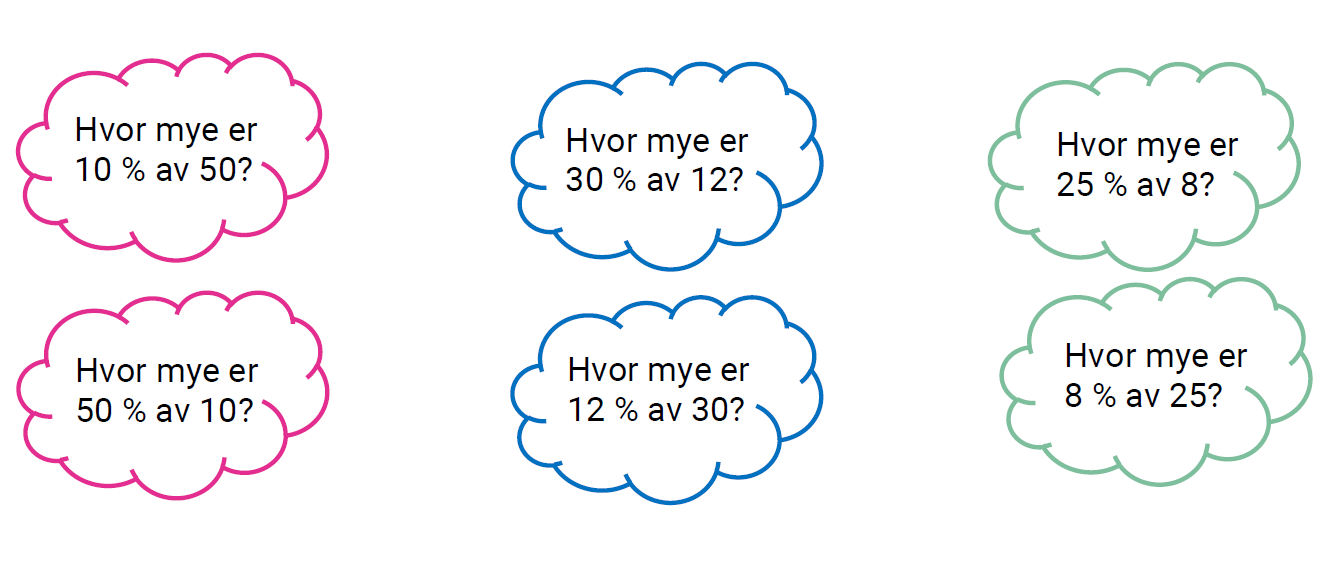

Argumenter for hvorfor to oppgaver som er satt opp i oppgavepar på samme måte
som ovenfor, alltid vil ha samme svar.

In [50]:
# Beregn 30 % av 12 og 12 % av 30
prosent_30_av_12 = (30 / 100) * 12
prosent_12_av_30 = (12 / 100) * 30

# Print resultatene
print(f"30 % av 12 er: {prosent_30_av_12}")
print(f"12 % av 30 er: {prosent_12_av_30}")

# Argumentasjon for hvorfor to oppgaver som er satt opp på samme måte alltid vil ha samme svar
def prosent_av(a, b):
    return (a / 100) * b

# Generell formel for prosentberegning
p = 30
q = 12

# Beregn p % av q og q % av p
p_prosent_av_q = prosent_av(p, q)
q_prosent_av_p = prosent_av(q, p)

# Print resultatene
print(f"{p} % av {q} er: {p_prosent_av_q}")
print(f"{q} % av {p} er: {q_prosent_av_p}")

# Forklaring Når vi beregner prosentandelen av et tall, bruker vi formelen: prosentandel av a = (p / 100) * a, hvor p er prosentandelen og a er tallet.

#For de to oppgavene:
#p % av q kan skrives som (p / 100) * q
#q % av p kan skrives som (q / 100) * p

#La oss se på de generelle tilfellene:
#p % av q kan skrives som (p / 100) * q
#q % av p kan skrives som (q / 100) * p

#Hvis vi sammenligner disse to uttrykkene:
#(p / 100) * q = (q / 100) * p

#Begge uttrykkene er like fordi multiplikasjon er kommutativ, det vil si at rekkefølgen på faktorene ikke påvirker produktet:
#(p * q) / 100 = (q * p) / 100

#Derfor vil p % av q alltid være lik q % av p.")

30 % av 12 er: 3.5999999999999996
12 % av 30 er: 3.5999999999999996
30 % av 12 er: 3.5999999999999996
12 % av 30 er: 3.5999999999999996


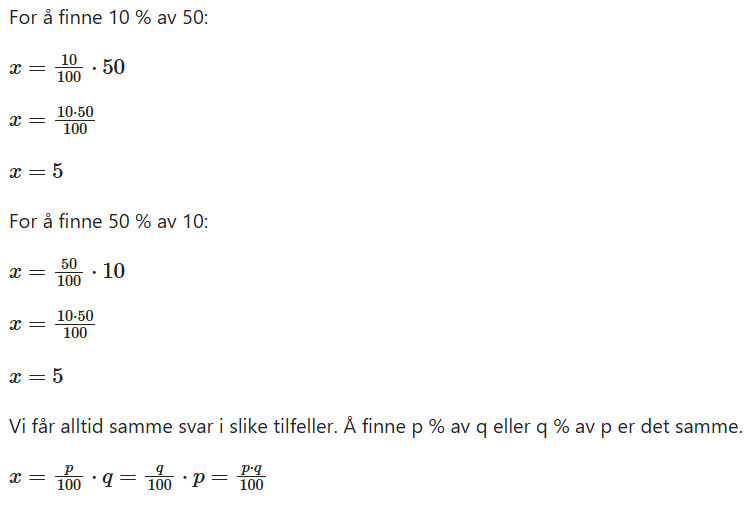

## Oppgave 4 (2 poeng) - Del 2
Hermann må betale for å parkere på jobb. Han kan velge mellom tre ulike
parkeringsavtaler.

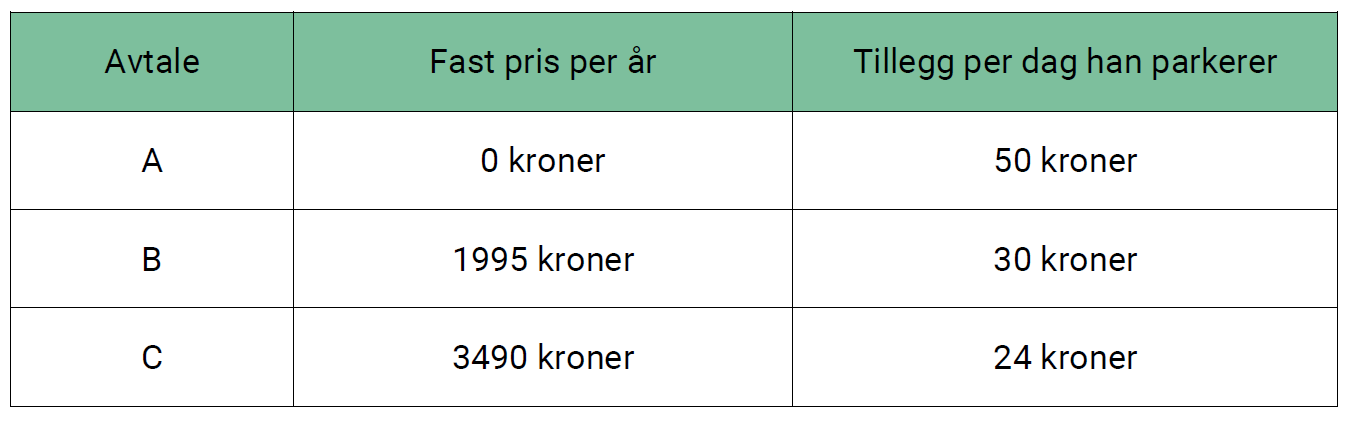

a) Sett opp en modell som beskriver alternativ A, en modell som beskriver alternativ
B og en modell som beskriver alternativ C.

b) Hvor mange ganger må Hermann parkere i løpet av et år for at det skal lønne seg
å velge avtale B?

In [44]:
# a) Sett opp en modell som beskriver alternativ A, en modell som beskriver alternativ B og en modell som beskriver alternativ C.

# Alternativ A: Fast pris per år = 0 kroner, Tillegg per dag = 50 kroner
def kostnad_A(dager):
    return 0 + 50 * dager

# Alternativ B: Fast pris per år = 1995 kroner, Tillegg per dag = 30 kroner
def kostnad_B(dager):
    return 1995 + 30 * dager

# Alternativ C: Fast pris per år = 3490 kroner, Tillegg per dag = 24 kroner
def kostnad_C(dager):
    return 3490 + 24 * dager

# b) Finn intervallet Hermann kan parkere i løpet av et år for at det skal lønne seg å velge avtale B
# Vi finner antall dager hvor kostnaden for alternativ B er mindre enn kostnaden for alternativ A og C

# Finn antall dager hvor kostnaden for alternativ B er mindre enn kostnaden for alternativ A
dager_A = 0
while kostnad_B(dager_A) >= kostnad_A(dager_A):
    dager_A += 0.1

# Finn antall dager hvor kostnaden for alternativ B er mindre enn kostnaden for alternativ C
dager_C = 0
while kostnad_B(dager_C) <= kostnad_C(dager_C):
    dager_C += 0.1

# Juster dager_C for å inkludere den siste dagen hvor kostnaden for B er mindre enn C
dager_C -= 0.1

print(f"Hermann må parkere mellom {dager_A:.0f} og {dager_C:.0f} ganger i løpet av et år for at det skal lønne seg å velge avtale B.")

Hermann må parkere mellom 100 og 249 ganger i løpet av et år for at det skal lønne seg å velge avtale B.


## Oppgave 5 (6 poeng) - Del 2

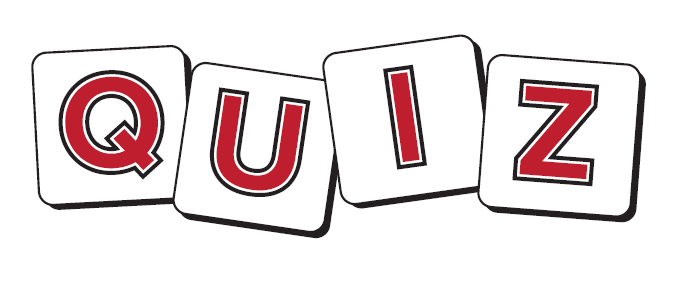

En fotoklubb arrangerer quiz hver torsdag. Det er tre lag som alltid deltar på quizen.
På hvert av lagene er det seks personer.
Nedenfor ser du alderen til de seks personene på lag A.

15 år 60 år 24 år 18 år 45 år 78 år

a) Bestem medianalderen, gjennomsnittsalderen og standardavviket for alderen til
de seks personene på laget.
Du får vite dette om alderen til personene som er med på hvert av de to andre lagene:
Lag B
Medianalderen og gjennomsnittsalderen for personene på lag B er høyere enn for
lag A, men standardavviket er mindre.
Lag C
Medianalderen for personene på lag C er lavere enn for lag A.
Gjennomsnittsalderen er høyere enn for lag A. Standardavviket er også høyere enn
for lag A.

b) Hva kan du si om alderen til personene på lag B og på lag C sammenliknet med
personene på lag A ut fra disse opplysningene?

c) Sett opp et eksempel som viser en mulig aldersfordeling for lag B og for lag C. Vis
at gjennomsnittsalder, medianalder og standardavvik stemmer med
opplysningene om alderen til personene på lagene.

In [53]:
# a) Beregning for lag A:
import numpy as np

# Alder til de seks personene på lag A
alder_lag_A = [15, 60, 24, 18, 45, 78]

# Medianalder
median_alder_A = np.median(alder_lag_A)

# Gjennomsnittsalder
gjennomsnitt_alder_A = np.mean(alder_lag_A)

# Utvalgsstandardavvik
utvalgsstandardavvik_alder_A = np.std(alder_lag_A, ddof=1)

print(f"Medianalderen for lag A: {median_alder_A}")
print(f"Gjennomsnittsalderen for lag A: {gjennomsnitt_alder_A:.2f}")
print(f"Utvalgsstandardavviket for lag A: {utvalgsstandardavvik_alder_A:.2f}")

Medianalderen for lag A: 34.5
Gjennomsnittsalderen for lag A: 40.00
Utvalgsstandardavviket for lag A: 25.43


In [60]:
# Eksempel på aldersfordeling for lag B og lag C:
import numpy as np

# Eksempel på aldersfordeling for lag B
alder_lag_B = [55, 65, 78, 37, 42, 53]

# Medianalder
median_alder_B = np.median(alder_lag_B)

# Gjennomsnittsalder
gjennomsnitt_alder_B = np.mean(alder_lag_B)

# Utvalgsstandardavvik
utvalgsstandardavvik_alder_B = np.std(alder_lag_B, ddof=1)

print(f"\nMedianalderen for lag B: {median_alder_B}")
print(f"Gjennomsnittsalderen for lag B: {gjennomsnitt_alder_B:.2f}")
print(f"Utvalgsstandardavviket for lag B: {utvalgsstandardavvik_alder_B:.2f}")

# Eksempel på aldersfordeling for lag C
alder_lag_C = [17, 21, 85, 92, 18, 23]

# Medianalder
median_alder_C = np.median(alder_lag_C)

# Gjennomsnittsalder
gjennomsnitt_alder_C = np.mean(alder_lag_C)

# Utvalgsstandardavvik
utvalgsstandardavvik_alder_C = np.std(alder_lag_C, ddof=1)

print(f"\nMedianalderen for lag C: {median_alder_C}")
print(f"Gjennomsnittsalderen for lag C: {gjennomsnitt_alder_C:.2f}")
print(f"Utvalgsstandardavviket for lag C: {utvalgsstandardavvik_alder_C:.2f}")


Medianalderen for lag B: 54.0
Gjennomsnittsalderen for lag B: 55.00
Utvalgsstandardavviket for lag B: 15.01

Medianalderen for lag C: 22.0
Gjennomsnittsalderen for lag C: 42.67
Utvalgsstandardavviket for lag C: 35.64


In [55]:
print("På lag B er både gjennomsnittsalderen og medianalderen høyere enn på lag A. Standardavviket er derimot lavere. Det vil si at deltakerne på laget jevnt over er eldre, og at det ikke er like stor aldersforskjell på dem.")
print("På lag C er medianalderen lavere enn på lag A, men gjennomsnittsalderen og standardavviket er høyere. Det vil si at minst halvparten av deltakerne på lag C er yngre enn medianalderen på lag A. Men siden gjennomsnittsalderen er høyere enn på lag A, er det noen eldre deltakere som trekker gjennomsnittsalderen opp. Et større standardavvik betyr at aldersforskjellen er større blant deltakerne på lag C.")

På lag B er både gjennomsnittsalderen og medianalderen høyere enn på lag A. Standardavviket er derimot lavere. Det vil si at deltakerne på laget jevnt over er eldre, og at det ikke er like stor aldersforskjell på dem.
På lag C er medianalderen lavere enn på lag A, men gjennomsnittsalderen og standardavviket er høyere. Det vil si at minst halvparten av deltakerne på lag C er yngre enn medianalderen på lag A. Men siden gjennomsnittsalderen er høyere enn på lag A, er det noen eldre deltakere som trekker gjennomsnittsalderen opp. Et større standardavvik betyr at aldersforskjellen er større blant deltakerne på lag C.


## Oppgave 6 (3 poeng) - Del 2
For ni uker siden begynte Hanne å løpe. Tabellen nedenfor viser hvor lenge hun klarte
å løpe sammenhengende noen av dagene disse ukene.

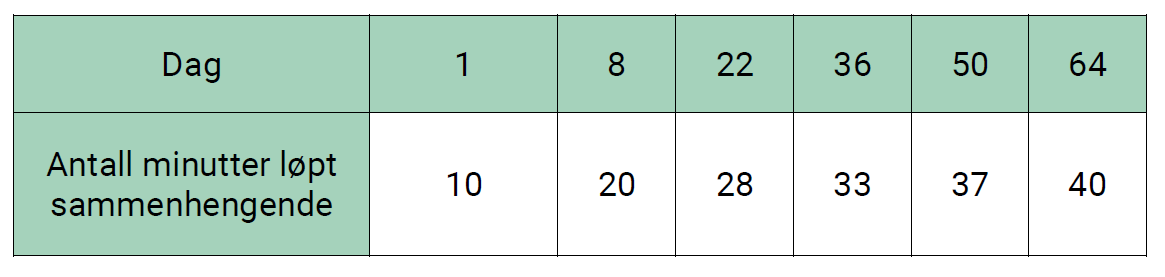

Utviklingen kan beskrives med en modell gitt på formen: L(x) = a*x^b , x>1

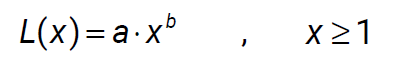

der L(x) er antall minutter Hanne klarte å løpe sammenhengende på dag x.

a) Bruk opplysningene i tabellen til å bestemme tallene a og b.

b) Hvor mange uker vil det ta før Hanne klarer å løpe 45 minutter sammenhengende
ifølge modellen?

c) Hvor mange minutter har tiden Hanne klarer å løpe sammenhengende, økt med i
gjennomsnitt per dag fra dag 1 til dag 60 ifølge modellen?


In [64]:
import numpy as np
from scipy.optimize import curve_fit

# Data fra tabellen
dager = np.array([1, 8, 22, 36, 50, 64])
minutter = np.array([10, 20, 28, 33, 37, 40])

# Modelfunksjon L(x) = a * x^b
def modell(x, a, b):
    return a * x ** b

# Tilpass modellen til dataene
parametere, _ = curve_fit(modell, dager, minutter)
a, b = parametere

# Skriv ut verdiene for a og b
print(f"Verdiene for a og b er: a = {a:.1f}, b = {b:.2f}")

# Beregn dagen når Hanne kan løpe 45 minutter
mål_minutter = 45
mål_dag = (mål_minutter / a) ** (1 / b)

print(f"Det vil ta omtrent {mål_dag:.0f} dager før Hanne kan løpe 45 minutter sammenhengende.")

# Beregn den gjennomsnittlige økningen i løpetiden per dag fra dag 1 til dag 60
dag_60_minutter = modell(60, a, b)
gjennomsnittlig_økning_per_dag = (dag_60_minutter - modell(1, a, b)) / (60 - 1)

print(f"Den gjennomsnittlige økningen i løpetiden per dag fra dag 1 til dag 60 er omtrent {gjennomsnittlig_økning_per_dag:.2f} minutter.")

Verdiene for a og b er: a = 10.0, b = 0.33
Det vil ta omtrent 91 dager før Hanne kan løpe 45 minutter sammenhengende.
Den gjennomsnittlige økningen i løpetiden per dag fra dag 1 til dag 60 er omtrent 0.50 minutter.


## Oppgave 7 (4 poeng) - Del 2
Tabellen nedenfor viser hvor mange timer menn og kvinner brukte på ulike aktiviteter
en gjennomsnittsdag i 1970, 1990 og 2010.

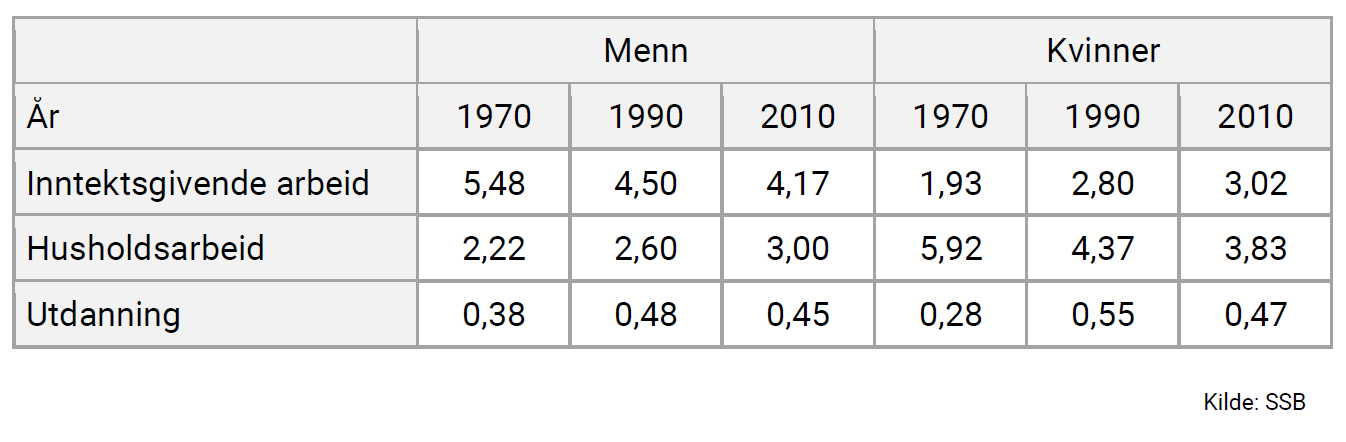

Tenk deg at du skal presentere funn fra dette datamaterialet for klassen din.

Gjør beregninger og sammenlikninger, og lag ulike framstillinger som du kan bruke i
en presentasjon. Presentasjonen skal inneholde både beregninger, diagrammer og
forklarende kommentarer.

Inntektsgivende arbeid:
Standardavvik: 1.03
Gjennomsnitt: 2.13
Median: 1.70

Husholdsarbeid:
Standardavvik: 1.19
Gjennomsnitt: -2.10
Median: -1.77

Utdanning:
Standardavvik: 0.07
Gjennomsnitt: 0.00
Median: -0.02


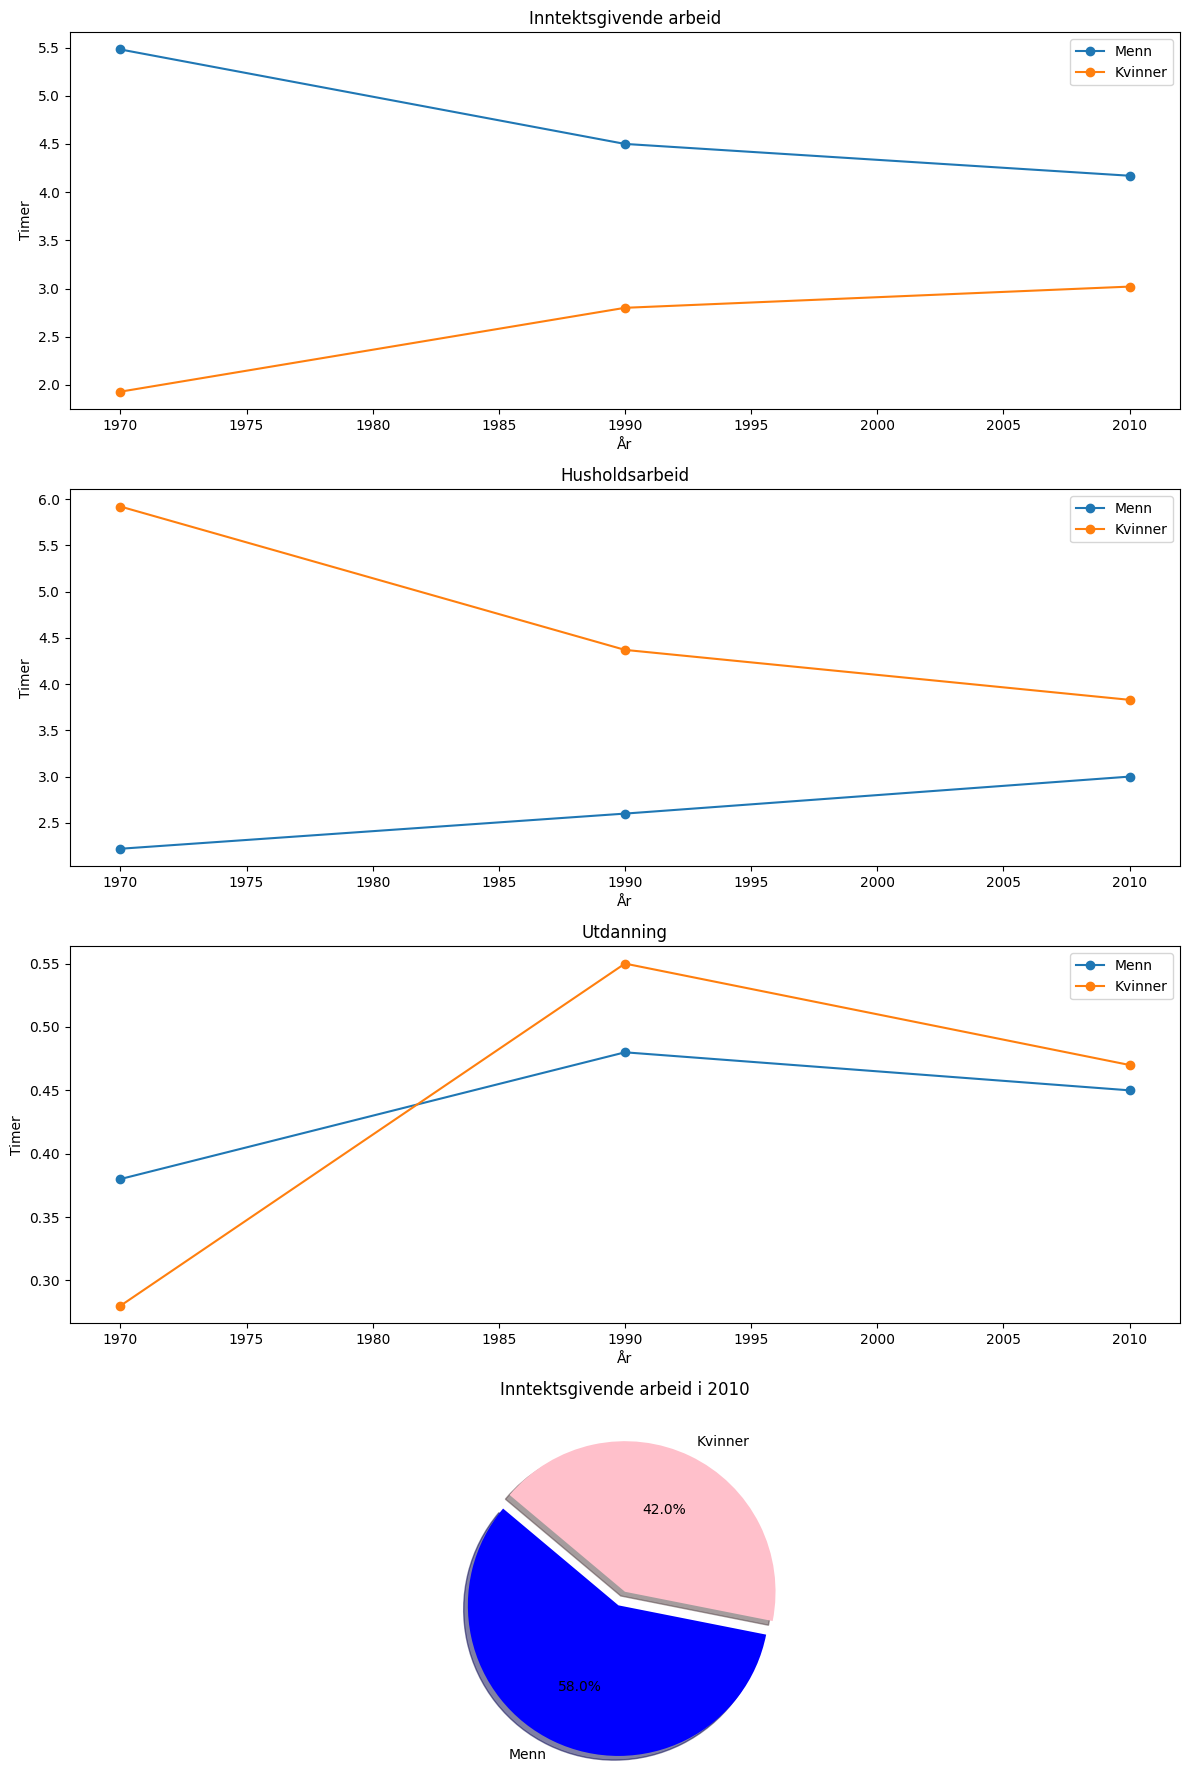

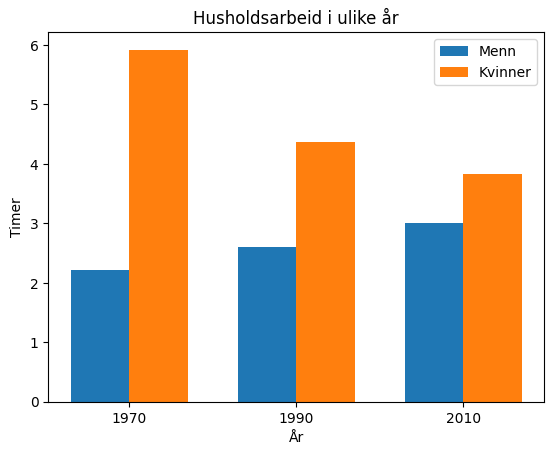

In [66]:
import numpy as np
import matplotlib.pyplot as plt

# Data fra tabellen
år = np.array([1970, 1990, 2010])
menn_inntektsgivende_arbeid = np.array([5.48, 4.50, 4.17])
kvinner_inntektsgivende_arbeid = np.array([1.93, 2.80, 3.02])
menn_husholdsarbeid = np.array([2.22, 2.60, 3.00])
kvinner_husholdsarbeid = np.array([5.92, 4.37, 3.83])
menn_utdanning = np.array([0.38, 0.48, 0.45])
kvinner_utdanning = np.array([0.28, 0.55, 0.47])

# Beregn forskjellen mellom menn og kvinner
forskjell_inntektsgivende_arbeid = menn_inntektsgivende_arbeid - kvinner_inntektsgivende_arbeid
forskjell_husholdsarbeid = menn_husholdsarbeid - kvinner_husholdsarbeid
forskjell_utdanning = menn_utdanning - kvinner_utdanning

# Beregn standardavvik, gjennomsnitt og median for forskjellen
def beregn_statistikk(forskjell):
    std_avvik = np.std(forskjell)
    gjennomsnitt = np.mean(forskjell)
    median = np.median(forskjell)
    return std_avvik, gjennomsnitt, median

std_avvik_inntektsgivende_arbeid, gjennomsnitt_inntektsgivende_arbeid, median_inntektsgivende_arbeid = beregn_statistikk(forskjell_inntektsgivende_arbeid)
std_avvik_husholdsarbeid, gjennomsnitt_husholdsarbeid, median_husholdsarbeid = beregn_statistikk(forskjell_husholdsarbeid)
std_avvik_utdanning, gjennomsnitt_utdanning, median_utdanning = beregn_statistikk(forskjell_utdanning)

# Print resultater
print("Inntektsgivende arbeid:")
print(f"Standardavvik: {std_avvik_inntektsgivende_arbeid:.2f}")
print(f"Gjennomsnitt: {gjennomsnitt_inntektsgivende_arbeid:.2f}")
print(f"Median: {median_inntektsgivende_arbeid:.2f}")

print("\nHusholdsarbeid:")
print(f"Standardavvik: {std_avvik_husholdsarbeid:.2f}")
print(f"Gjennomsnitt: {gjennomsnitt_husholdsarbeid:.2f}")
print(f"Median: {median_husholdsarbeid:.2f}")

print("\nUtdanning:")
print(f"Standardavvik: {std_avvik_utdanning:.2f}")
print(f"Gjennomsnitt: {gjennomsnitt_utdanning:.2f}")
print(f"Median: {median_utdanning:.2f}")

# Diagrammer
plt.figure(figsize=(12, 18))

# Inntektsgivende arbeid - Linjediagram
plt.subplot(4, 1, 1)
plt.plot(år, menn_inntektsgivende_arbeid, label='Menn', marker='o')
plt.plot(år, kvinner_inntektsgivende_arbeid, label='Kvinner', marker='o')
plt.title('Inntektsgivende arbeid')
plt.xlabel('År')
plt.ylabel('Timer')
plt.legend()

# Husholdsarbeid - Linjediagram
plt.subplot(4, 1, 2)
plt.plot(år, menn_husholdsarbeid, label='Menn', marker='o')
plt.plot(år, kvinner_husholdsarbeid, label='Kvinner', marker='o')
plt.title('Husholdsarbeid')
plt.xlabel('År')
plt.ylabel('Timer')
plt.legend()

# Utdanning - Linjediagram
plt.subplot(4, 1, 3)
plt.plot(år, menn_utdanning, label='Menn', marker='o')
plt.plot(år, kvinner_utdanning, label='Kvinner', marker='o')
plt.title('Utdanning')
plt.xlabel('År')
plt.ylabel('Timer')
plt.legend()

# Sektordiagram for inntektsgivende arbeid i 2010
plt.subplot(4, 1, 4)
labels = ['Menn', 'Kvinner']
sizes = [menn_inntektsgivende_arbeid[2], kvinner_inntektsgivende_arbeid[2]]
colors = ['blue', 'pink']
explode = (0.1, 0) # Ekstraher den første sektoren (Menn)

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title('Inntektsgivende arbeid i 2010')

# Justere layout og vise diagrammer
plt.tight_layout()
plt.show()

# Søylediagram for husholdsarbeid i ulike år
indeks = np.arange(len(år))
bredde = 0.35

fig, ax = plt.subplots()
rektangler1 = ax.bar(indeks - bredde/2, menn_husholdsarbeid, bredde,
label='Menn')
rektangler2 = ax.bar(indeks + bredde/2, kvinner_husholdsarbeid,
bredde,
label='Kvinner')

ax.set_xlabel('År')
ax.set_ylabel('Timer')
ax.set_title('Husholdsarbeid i ulike år')
ax.set_xticks(indeks)
ax.set_xticklabels(år)
ax.legend()

plt.show()

## Oppgave 8 (3 poeng) - Del 2

Tore ønsker å delta i et sykkelritt og vil begynne å trene.
Den første uken vil han sykle 40 kilometer.
For hver uke vil han øke lengden han sykler, med 5 %.

a) Hvor mange kilometer kommer han til å sykle i uke 50 dersom han klarer å følge
planen?

b) Hvor mange kilometer vil han til sammen ha syklet i løpet av 50 uker dersom han
klarer å følge planen?

In [69]:
# Startverdier
start_km = 40
økning_prosent = 0.05

# a) Beregn antall kilometer Tore kommer til å sykle i uke 50
uke_50_km = start_km * (1 + økning_prosent) ** 49

# b) Beregn totalt antall kilometer Tore vil ha syklet i løpet av 50 uker
totalt_km = 0
for uke in range(50):
    totalt_km += start_km * (1 + økning_prosent) ** uke

# Resultater
print(f"Tore kommer til å sykle {uke_50_km:.0f} kilometer i uke 50.")
print(f"Tore vil til sammen ha syklet {totalt_km:.0f} kilometer i løpet av 50 uker.")

Tore kommer til å sykle 437 kilometer i uke 50.
Tore vil til sammen ha syklet 8374 kilometer i løpet av 50 uker.
